# Mapping out the present state of the game

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import puzz

In [22]:
net = puzz.Network(['normal', 'death exploit'])

In [23]:
net.add_obstacle('cave1')
net.add_obstacle('arrow trap')
net.add_obstacle('knight')
net.add_obstacle('volcano')
net.add_obstacle('fireman')

net.add_ability('strength')
net.add_ability('fireproof')
net.add_ability('armor')

In [24]:
net.defeats('strength', 'knight')
net.defeats('death exploit', 'cave1')
net.defeats('armor', 'arrow trap')
net.defeats('normal', 'fireman')
net.defeats('fireproof', 'volcano')

In [30]:
net.add_connection('death exploit', 'cave1')
net.add_connection('cave1', 'strength')
net.add_connection('strength', 'knight')
net.add_connection('knight', 'armor')
net.add_connection('armor', 'arrow trap')

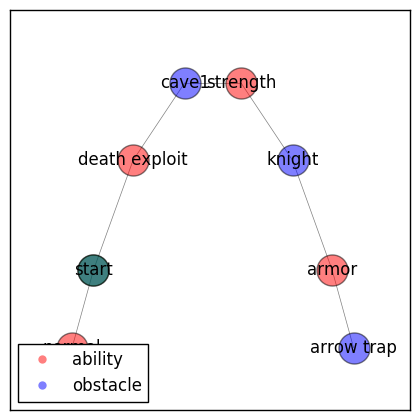

In [31]:
net.plot()